# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots


# Downloading and Prepping Data <a id="2"></a>


In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
print(df_can.shape)

(195, 43)


Clean up data.


In [ ]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
g
df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)
on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib<a id="4"></a>


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 
print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


# Pie Charts <a id="6"></a>



Step 1: Gather data. 

We will use _pandas_ `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3.  **Combine:** Combining the results into a data structure.


In [ ]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


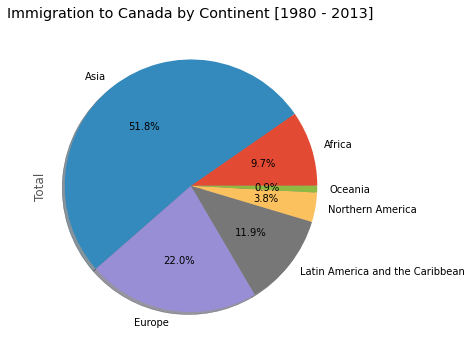

In [ ]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=0,    
                            shadow=True,         
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.show()

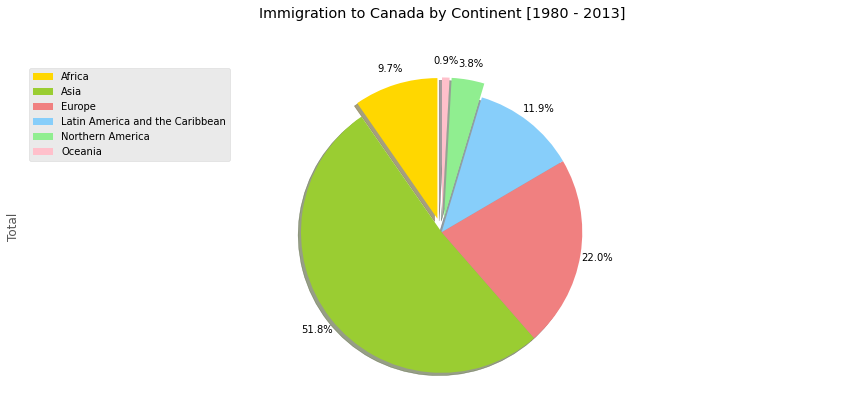

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list, 
                            explode=explode_list 
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.


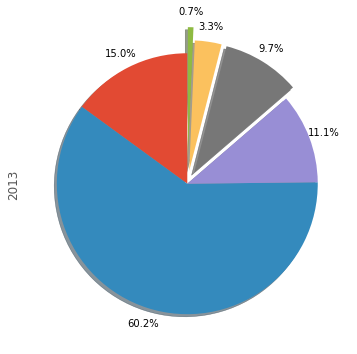

In [ ]:
### type your answer here

explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] 
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 
                            pctdistance=1.12,            
                            explode=explode_list      
                            )


# Box Plots <a id="8"></a>


Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [ ]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.


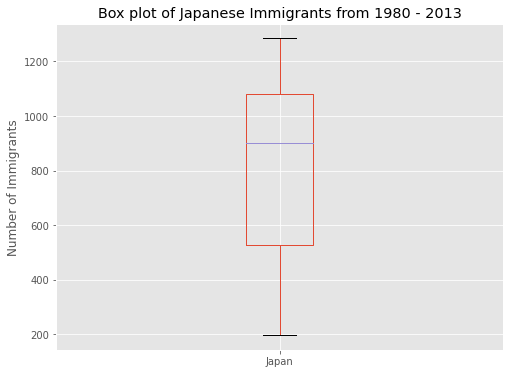

In [ ]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Step 1: Get the dataset for China and India and call the dataframe **df_CI**.


In [ ]:
### type your answer here
df_cl=df_can.loc[['China','India'],years].transpose()
df_cl.head()


Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [ ]:
### type your answer here
df_cl.describe()


Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Step 2: Plot data.


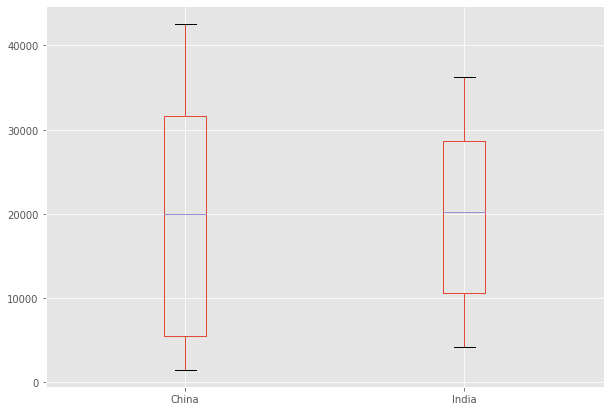

In [ ]:
### type your answer here
df_cl.plot(kind='box',figsize=(10,7))




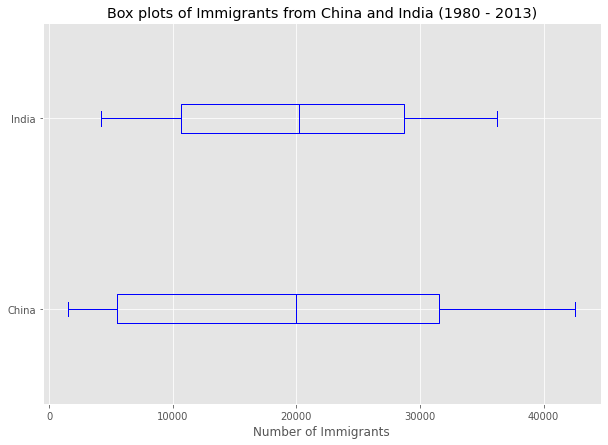

In [ ]:
df_cl.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


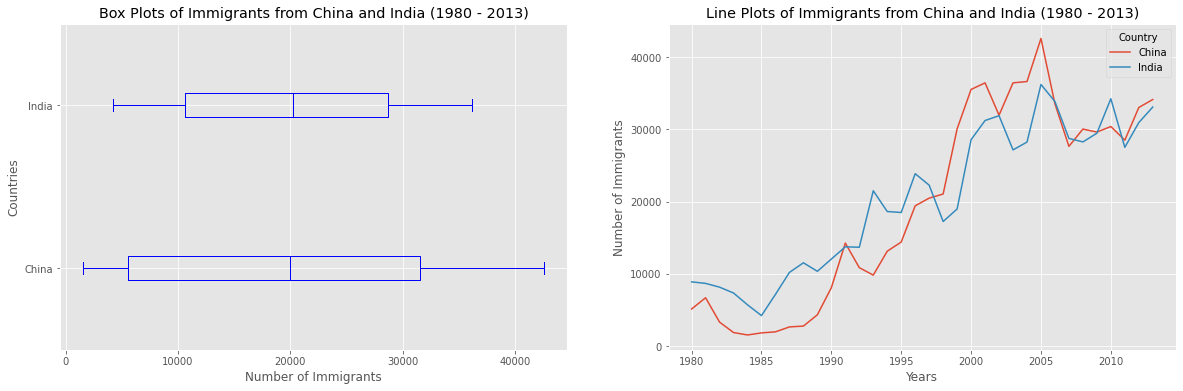

In [ ]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2)
df_cl.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_cl.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Let's try something a little more advanced. 

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the _decades_ `1980s`, `1990s`, and `2000s`.


Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.


In [ ]:
### type your answer here
df_can.sort_values(by='Total',ascending=False,axis=0,inplace=True)
df_top15=df_can.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [ ]:
### type your answer here
years80=list(map(str,range(1980,1990)))
years90=list(map(str,range(1990,2000)))
years00=list(map(str,range(2000,2010)))

df_80=df_top15.loc[:,years80].sum(axis=1)
df_90=df_top15.loc[:,years90].sum(axis=1)
df_00=df_top15.loc[:,years00].sum(axis=1)
 
new_df=pd.DataFrame({'1980':df_80,'1990':df_90,'2000':df_00})

new_df.head()

,1980,1990,2000
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [ ]:
### type your answer here
new_df.describe()

,1980,1990,2000
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Step 3: Plot the box plots.


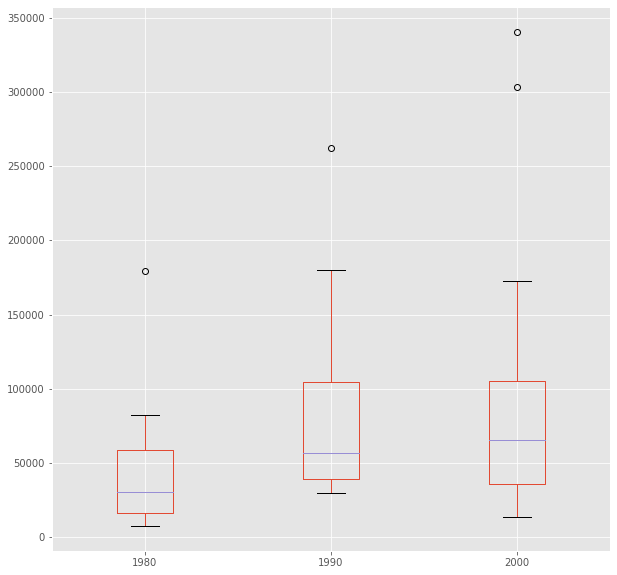

In [ ]:
### type your answer here
new_df.plot(kind='box',figsize=(10,10))



In [ ]:
new_df=new_df.reset_index()
new_df[new_df['2000']>209611.5]

,Country,1980,1990,2000
0,India,82154,180395,303591
1,China,32003,161528,340385


<!-- The correct answer is:
new_df[new_df['2000s']> 209611.5]
-->


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [ ]:

df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


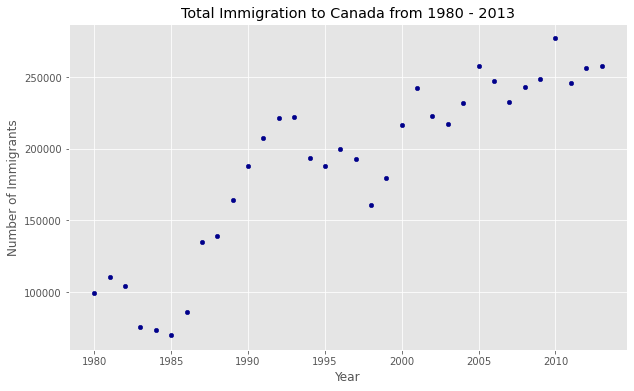

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:
x = df_tot['year']     
y = df_tot['total']     
fit = np.polyfit(x, y, deg=4)
print(fit)
p=np.poly1d(fit)

[ 9.78924939e-01 -7.81693966e+03  2.34071452e+07 -3.11509000e+10
  1.55459376e+13]


In [ ]:
fit[0] * x + fit[1]

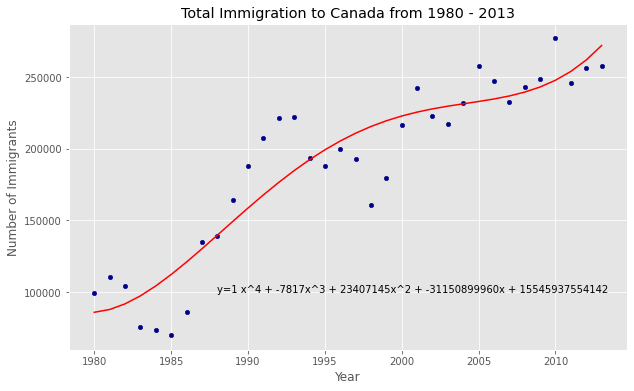

'No. Immigrants = 1 * Year + -7817'

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,p(x), color='red') 
plt.annotate('y={0:.0f} x^4 + {1:.0f}x^3 + {2:.0f}x^2 + {3:.0f}x + {4:.0f}'.format(fit[0], fit[1],fit[2],fit[3],fit[4]), xy=(1988, 100000))

plt.show()

'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


Step 1: Get the data:

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.


In [ ]:
### type your answer here
df_dns=df_can.loc[['Denmark','Norway','Sweden'],years]
df_total=df_dns[years].sum()
df_total=pd.DataFrame(df_total)
df_total.reset_index(inplace=True)
df_total.columns=["Year",'Total']
df_total['Year']=list(map(int,df_total['Year']))
df_total.head()

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [ ]:
x=df_total['Year']
y=df_total['Total']
f=np.polyfit(x,y,deg=3)
p=np.poly1d(f)

Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.


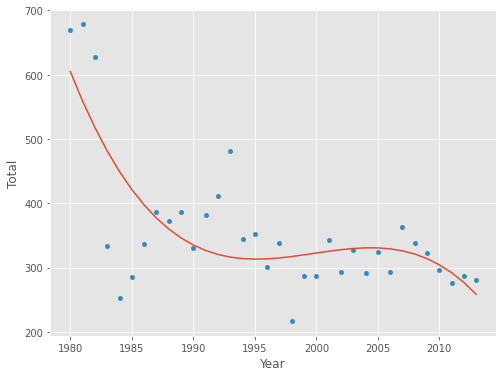

In [ ]:
### type your answer here
df_total.plot(kind='scatter',x='Year',y='Total',figsize=(8,6))
plt.plot(x,p(x))
plt.show()

# Bubble Plots <a id="12"></a>


Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and bring it in the dataframe.


In [ ]:
df_can_t = df_can[years].transpose() 
df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania,Haiti,Guyana,Portugal,Egypt,Morocco,Colombia,Iraq,Algeria,Israel,Bangladesh,Germany,Russian Federation,Mexico,Afghanistan,El Salvador,Ukraine,Trinidad and Tobago,Somalia,South Africa,Nigeria,Jordan,Ethiopia,Peru,Turkey,...,Central African Republic,Slovenia,Tajikistan,Bahrain,Botswana,Democratic People's Republic of Korea,Namibia,Turkmenistan,Malawi,"China, Macao Special Administrative Region",Oman,Luxembourg,Cabo Verde,Comoros,Swaziland,Mozambique,Qatar,Tonga,Lesotho,Montenegro,Guinea-Bissau,Samoa,Papua New Guinea,Equatorial Guinea,Liechtenstein,Maldives,Monaco,Canada,Nauru,Andorra,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375,1666,2334,4473,612,325,266,262,80,1403,83,1626,0,409,16,110,0,958,7,1026,81,177,98,317,481,...,4,0,0,0,10,1,0,0,5,0,0,14,1,0,4,0,0,2,1,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438,3692,2943,3486,660,471,326,245,67,1711,84,1977,0,394,39,295,0,947,10,1118,60,160,59,456,874,...,3,0,0,2,1,1,5,0,4,0,0,4,1,2,1,0,0,4,1,0,0,7,2,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583,3498,3575,2432,755,447,360,260,71,1334,86,3062,0,491,39,882,0,972,7,781,58,155,54,401,706,...,1,0,0,1,3,3,5,0,6,0,0,2,2,2,1,7,0,7,1,0,0,4,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543,2860,2650,1433,455,335,244,380,69,541,81,2376,0,490,47,2587,0,766,12,379,58,113,98,241,280,...,0,0,0,1,3,1,3,0,3,0,8,5,0,0,0,2,0,1,2,0,0,1,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524,1418,1932,1398,447,248,235,428,63,446,98,1610,0,509,71,2666,0,606,14,271,78,102,154,306,338,...,0,0,0,1,7,4,2,0,2,0,0,1,11,0,10,3,0,2,7,0,1,3,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where _`X`_ is an original value, _`X'`_ is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [ ]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Step 3: Plot the data. 

-   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
-   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    -   multiply weights by 2000 to scale it up on the graph, and,
    -   add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).


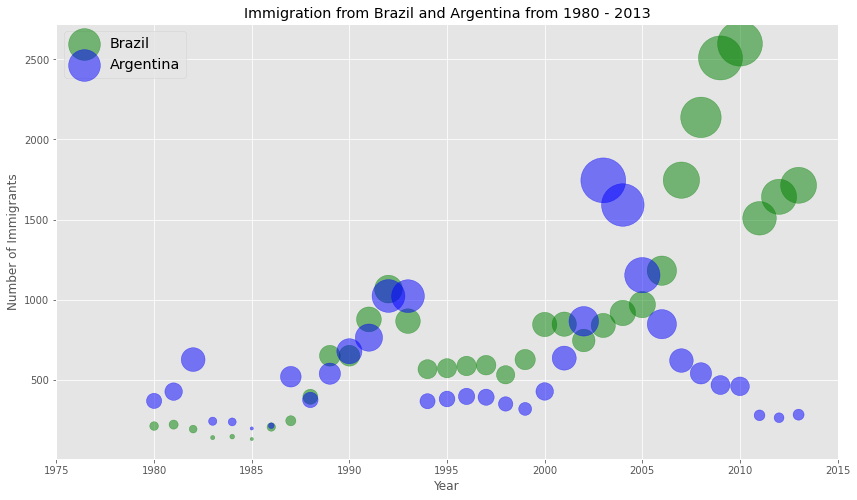

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='green',
                    s=norm_brazil * 2000 + 10,  
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.


Step 1: Normalize the data pertaining to China and India.


In [ ]:
### type your answer here
norm_india=((df_can_t['India']-df_can_t['India'].min())/(df_can_t['India'].max()-df_can_t['India'].min()))

norm_china=((df_can_t['China']-df_can_t['China'].min())/(df_can_t['China'].max()-df_can_t['China'].min()))




Step 2: Generate the bubble plots.


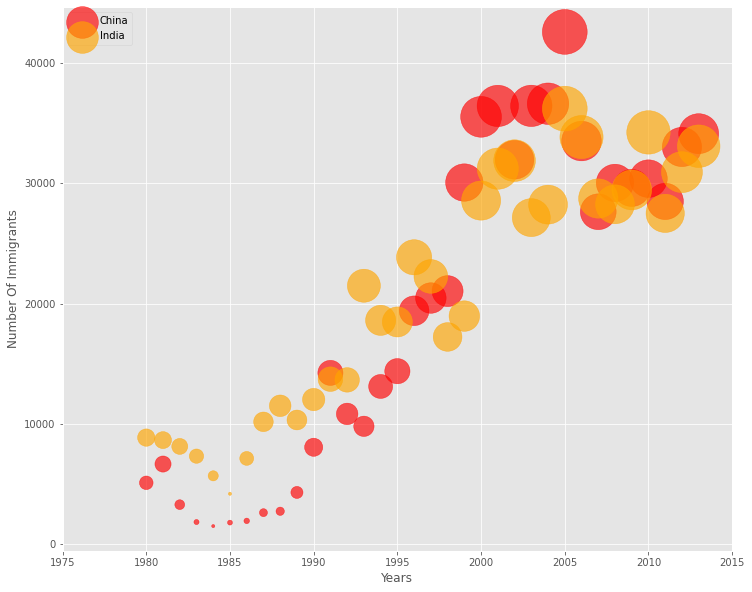

In [ ]:
### type your answer here

ax0=df_can_t.plot(kind='scatter',x='Year',y='China',alpha=0.65,xlim=(1975,2015),s=norm_china*2000+10,color='red',figsize=(12,10))
ax1=df_can_t.plot(kind='scatter',x='Year',y='India',alpha=0.65,xlim=(1975,2015),s=norm_india*2000+10,ax=ax0,color='orange')

ax0.set_ylabel(ylabel='Number Of Immigrants')
ax0.set_xlabel(xlabel='Years')
ax0.legend(['China','India'],loc='upper left')
